# HANC with a Welfare State

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Test 1: Solving and simulating the household problem](#toc2_)    
- 3. [Test 2: Evaluating the objective for finding the steady state](#toc3_)    
- 4. [Find stationary equilibrium](#toc4_)    
- 5. [Grid search](#toc5_)    
- 6. [Policy functions](#toc6_)    
- 7. [Simulation](#toc7_)    
- 8. [Test transition path](#toc8_)    
- 9. [Find transition path](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [12]:
model = HANCWelfareModelClass(name='baseline')

par = model.par
ss = model.ss
sol = model.sol
path = model.path

## 2. <a id='toc2_'></a>[Test 1: Solving and simulating the household problem](#toc0_)

We set all the steady values for the household problem manually at ad hoc values:

In [64]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.S = 0.0
ss.Chi = 0.0
model.solve_hh_ss(do_print=True)


household problem in ss solved in 0.1 secs [345 iterations]


We can now solve and simulate:

In [65]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.1 secs [345 iterations]


In [66]:
model.simulate_hh_ss(do_print=True)
print(ss.U_hh)

household problem in ss simulated in 0.0 secs [425 iterations]
-100000002.13163586


In [55]:
#Testting obj function 
# guessing on tau and K/L_y
x = [1.0, 0.0]

obj_ss(x, model)

(-107.33112536245852, 0.0)

In [67]:
model.find_ss(do_print=True)

starting at [3.8624]

 message: The solution converged.
 success: True
  status: 1
     fun: [ 6.999e-13  0.000e+00]
       x: [ 3.673e+00  0.000e+00]
    nfev: 9
    fjac: [[-1.000e+00  0.000e+00]
           [ 0.000e+00 -1.000e+00]]
       r: [-8.480e+00 -2.748e+00  9.816e-01]
     qtf: [-6.223e-08  0.000e+00]

steady state found in 1.4 secs
ss.K =  3.389
ss.A_hh =  3.389
ss.L =  0.923
ss.Y =  1.363
ss.r =  0.021
ss.w =  1.034
ss.clearing_A = 7.00e-13
ss.clearing_L = 0.00e+00
ss.clearing_Y = 3.27e-11


[-100000001.61794363, -837918423.5782949, -1394993937.8716955, -1765355920.485698, -2011584653.6580038, -2175285551.389796, -2457824241.3690844, -2494522003.317721, -2499288521.2489033, -2499907624.2127314, -2499988036.89246, -2499998481.357176, -2499999837.9447637, -2500000014.146219, -2500000037.0322847]


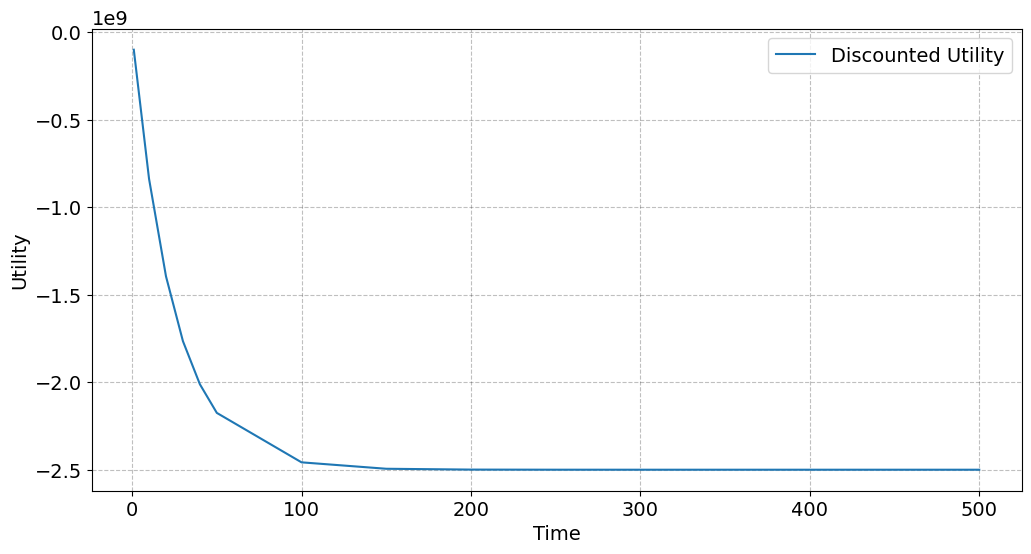

In [68]:
#Ploting the accumulation discounted utility
#par.T = 500
time_ = [1, 10, 20, 30, 40, 50,  100, 150, 200, 250, 300, 350, 400, 450, 500]

time_past = []
disc_utility = []
for i in time_:
    par.T = i 
    time_past.append(i)
    U =np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
    disc_utility.append(U)

#figure 
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(time_past, disc_utility, label='Discounted Utility')
ax.set_xlabel('Time')
ax.set_ylabel('Utility')
ax.legend()

# save figure
#fig.savefig('figs/fig_disc_utility.png', bbox_inches='tight')
#print(disc_utility)
plt.show()


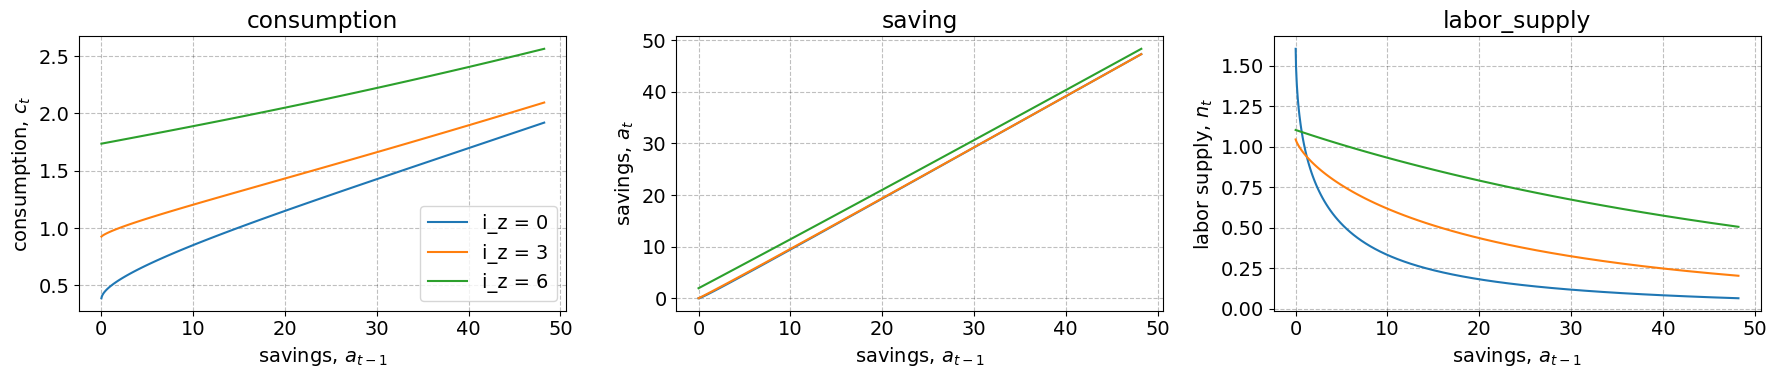

In [69]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 50

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')


fig.tight_layout()
#save figure
#fig.savefig('figs/fig_policy.png', bbox_inches='tight')

plt.show()

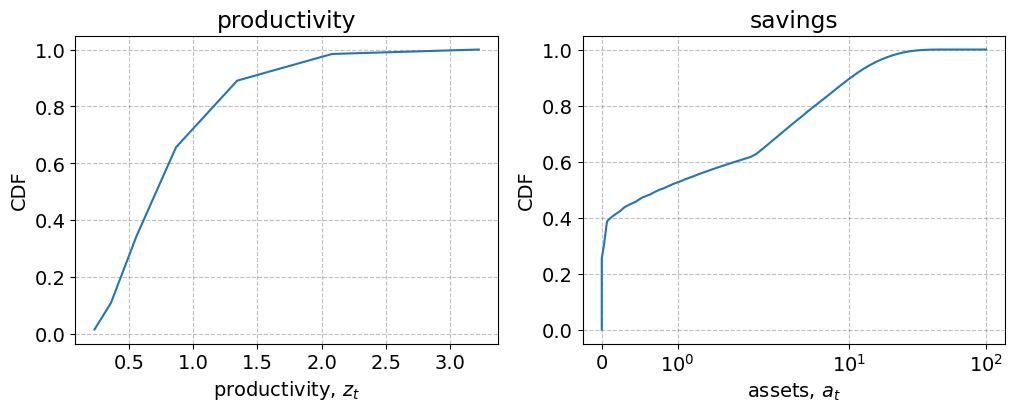

In [71]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D,axis=(0,2)))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

#save figure
#fig.savefig('figs/fig_distribution.png', bbox_inches='tight')
plt.show()

## 2. <a id='toc2_'></a>[Test 1: Solving and simulating the household problem](#toc0_)

-2500000037.0322847


household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Chi             in 0.2 secs
curly_Y and curly_D calculated for S               in 0.2 secs
curly_Y and curly_D calculated for r               in 0.2 secs
curly_Y and curly_D calculated for wt              in 0.2 secs
curly_E calculated in 0.9 secs
builiding blocks combined in 0.2 secs
household Jacobian computed in 1.9 secs

full Jacobians:
full Jacobian to unknowns computed in 0.9 secs [in evaluate_blocks(): 0.6 secs]
full Jacobian to shocks computed in 0.6 secs [in evaluate_blocks(): 0.4 secs]
note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 0 125 250 375 [computed in 1.0 secs]
finding Jacobian wrt. Chi            : 0 125 250 375 [computed in 0.3 secs]
finding Jacobian wrt. S              : 0 125 250 375 [computed in 0.3 secs]
finding Jacobian wrt. r              : 0 125 250 375 [computed in 0.3 secs]
findin

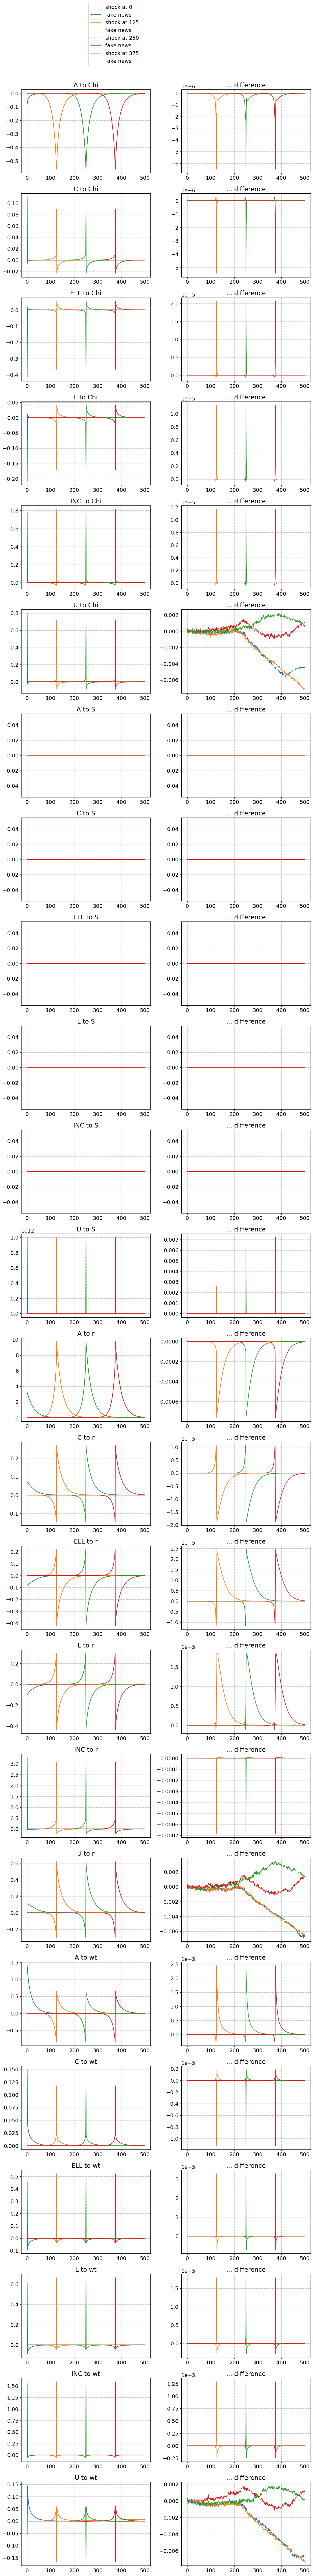

In [18]:
model.compute_jacs(do_print=True)
model.test_jacs()

In [22]:
model.test_path()

shocks: G L_G Gamma_G 
unknowns: K L_Y L 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             6.8e-10
 C_hh             2.0e-11
 ELL_hh           3.1e-11
 L_hh             2.6e-11
 INC_hh           1.2e-11
 U_hh             7.2e-07
blocks.market_clearing
 I                5.6e-17
 clearing_A       6.8e-10 [target]
 clearing_L       2.6e-11 [target]
 clearing_Y       3.3e-11 [target]
 clearing_G       0.0e+00 [target]


In [23]:
model.find_transition_path(shocks=[],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 6.83e-10
   6.83e-10 in clearing_A
   2.64e-11 in clearing_L
   0.00e+00 in clearing_G
   3.27e-11 in clearing_Y


LinAlgError: Last 2 dimensions of the array must be square

## Question 2

In [ ]:
ss.U_hh

In [ ]:
#Works 
par.G_ss = 0.2
model.find_ss(do_print=False)
print(f'{ss.U_hh = :.2f}')
values = (0.0, 0.1, 0.15, 0.2, 0.25, 0.3)

#dosent work (says float cant be interpreted as an integer)
for i in values:
    print(type(i))
    par.G_ss = i
    model.find_ss(do_print=True)
    print(f'{ss.U_hh = :.2f}')
    print(f'{par.G_ss = :.2f}')
    print(f'{ss.L_G = :.2f}')

In [10]:
values = (0.1, 0.15, 0.2, 0.25, 0.3)

for i in values:
    print(f'G = {i}')
    par.G_ss = i
    model.find_ss(do_print=False)
    print(f'Utility = {ss.U_hh:.2f}')

G = 0.1
Utility = -11.87
G = 0.15
Utility = -8.68
G = 0.2
Utility = -7.18
G = 0.25
Utility = -6.36
G = 0.3
Utility = -5.90


In [ ]:
# List of values
values = [0.001, 0.005, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

# Initialize empty lists to store inputs and utilities
inputs = []
utilities = []

# Iterate through the values
for i in values:
    print(f'G = {i}')
    par.G_ss = i
    model.find_ss(do_print=False)
    utility = ss.U_hh
    print(f'Utility = {utility:.2f}')
    print(f'{ss.L_G = :.2f}')
    print(f'{ss.L_Y = :.2f}')
    
    # Append the input value and utility to the respective lists
    inputs.append(i)
    utilities.append(utility)

# Plot the inputs and utilities
plt.figure(figsize=(8, 4))
plt.plot(inputs, utilities, marker='o', linestyle='-')
plt.xlabel('G')
plt.ylabel('Utility')
plt.title('Utility vs. G')
plt.grid(True)
plt.show()

And we can check whether the results make sort of sense:

In [ ]:
print(f'{model.ss.A_hh = :.2f}')
print(f'{model.ss.L_hh = :.2f}')
print(f'{model.ss.C_hh = :.2f}')

In [ ]:
model.test_hh_path()

## 3. <a id='toc3_'></a>[Test 2: Evaluating the objective for finding the steady state](#toc0_)

We can try out various inputs and look at the outputs:

In [ ]:
#Testting obj function 
# guessing on tau and K/L_y
x = [1.0, 0.0]

obj_ss(x, model)

## 4. <a id='toc4_'></a>[Find stationary equilibrium](#toc0_)

In [ ]:
model.find_ss(do_print=True)

## 5. <a id='toc5_'></a>[Grid search](#toc0_)

In [ ]:
par.tau_ss = 0.0
KL_min = ((1/par.beta+par.delta-1)/(par.alpha*par.Gamma_Y))**(1/(par.alpha-1))
KL_max = (par.delta/(par.alpha*par.Gamma_Y))**(1/(par.alpha-1))

In [ ]:
NKL = 10
KL_vec = np.hstack((np.linspace(KL_min+1e-2,KL_max-1e-2,NKL),np.linspace(KL_max+1e-2,10.0,NKL)))
clearing_A_vec = np.nan*np.ones(KL_vec.size)
r_vec = np.nan*np.ones(KL_vec.size)

model_ = model.copy()
for i,KL in enumerate(KL_vec):
    print(f'{KL = :6.2f}: ',end='')
    try:
        clearing_A_vec[i] = obj_ss(np.array([KL]),model_,do_print=False)
        r_vec[i] = model_.ss.r
        print(f'clearing_A = {clearing_A_vec[i]:16.8f}')
    except Exception as e:
        print(e)

In [ ]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('$B+K-A^{hh}$')
ax.plot(KL_vec[:NKL],clearing_A_vec[:NKL],'-o')
ax.plot(KL_vec[NKL:],clearing_A_vec[NKL:],'-o')
ax.axvline(ss.K/ss.L,color='black')
ax.set_yscale('symlog')

ax = fig.add_subplot(1,2,2)
ax.set_title('$r$')
ax.plot(KL_vec[:NKL],r_vec[:NKL],'-o')
ax.plot(KL_vec[NKL:],r_vec[NKL:],'-o')
ax.axvline(ss.K/ss.L,color='black');
ax.axhline(ss.r,color='black');

## 6. <a id='toc6_'></a>[Policy functions](#toc0_)

In [ ]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 50

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()
plt.show()

## 7. <a id='toc7_'></a>[Simulation](#toc0_)

In [ ]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D,axis=(0,2)))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

## 8. <a id='toc8_'></a>[Test transition path](#toc0_)

In [ ]:
try:
    model.test_ss()
except Exception as e:
    print('you need to update GEModelTools to call this function (optional)')

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.3 secs
household problem simulated along transition in 0.6 secs



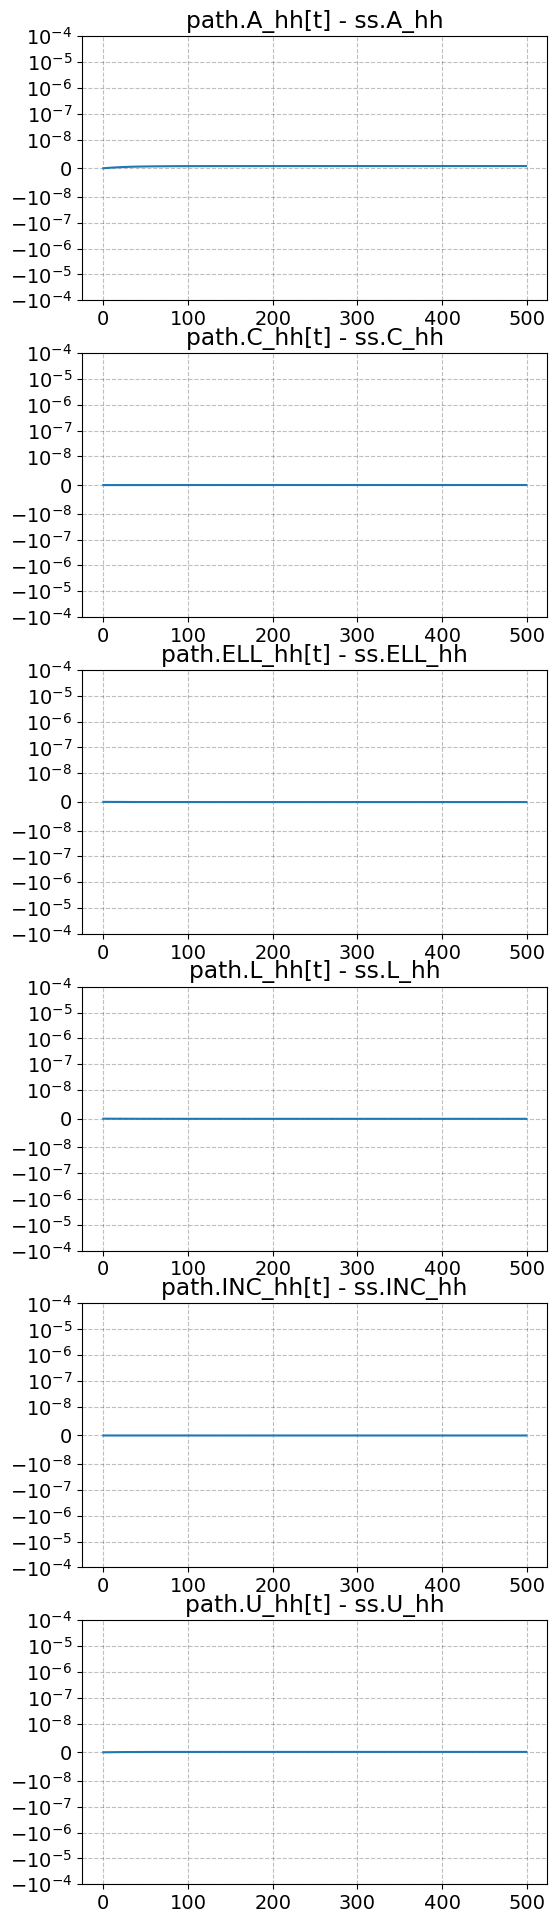

In [11]:
model.test_hh_path()

In [ ]:
model.draw_DAG()

In [30]:
model.ss.tau

0.0

In [42]:
model.test_path(in_place=True)

shocks: G L_G Gamma_G tau 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             6.8e-10
 C_hh             2.0e-11
 ELL_hh           3.1e-11
 L_hh             2.6e-11
 INC_hh           1.2e-11
 U_hh             7.2e-07
blocks.market_clearing
 I                5.6e-17
 clearing_A       6.8e-10 [target]
 clearing_L       2.6e-11 [target]
 clearing_Y       2.0e-11
 clearing_G       0.0e+00 [target]


In [12]:
model.path.A_hh

array([[2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.98002827],
       [2.980

## 9. <a id='toc9_'></a>[Find transition path](#toc0_)

In [ ]:
model.compute_jacs(do_print=True)

In [ ]:
model.test_jacs()

In [60]:
model.find_transition_path(shocks=[],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 4.68e+00
   4.68e+00 in clearing_A
   1.79e-01 in clearing_L
   0.00e+00 in clearing_G


LinAlgError: Last 2 dimensions of the array must be square

## 9. <a id='toc9_'></a>[Question a](#toc0_)

Calculating utility

In [ ]:
par.T = 500
v = np.sum([par.beta**t* np.sum(path.u[t,i_fix]*path.D[t,i_fix]/np.sum(path.D[t,i_fix]))
for t in range(par.T)])

print(f'{v = :.2f}')